# Linear Regression with two variables
Nwo I choose a second feature and implement it with linear regression.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
path_to_data= "../data/raw/MTurkData/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"
fitbit_4_12_16_daily_activity = pd.read_csv(path_to_data)

We need to find a 2nd feature

In [3]:
fitbit_4_12_16_daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [4]:
fitbit_4_12_16_daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

## Looking at the feature ``LoggedActivitiesDistance``

In [5]:
fitbit_4_12_16_daily_activity["LoggedActivitiesDistance"].describe()
# Count how many positive Logged Activities there are 
amountOfLoggedActivty = fitbit_4_12_16_daily_activity[fitbit_4_12_16_daily_activity["LoggedActivitiesDistance"] > 0].count()["LoggedActivitiesDistance"]
all = fitbit_4_12_16_daily_activity["Id"].count()
percentage = amountOfLoggedActivty / all * 100
print("Just %.2f %% of the dataset have a positive entry for Logged Activity Distance" %percentage)

Just 3.40 % of the dataset have a positive entry for Logged Activity Distance


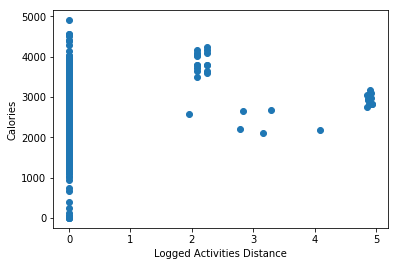

In [6]:
plt.scatter(fitbit_4_12_16_daily_activity["LoggedActivitiesDistance"], fitbit_4_12_16_daily_activity["Calories"])
plt.xlabel("Logged Activities Distance");
plt.ylabel("Calories");

Many people have 0 active minutes but of course still have a fairly high calorie consumotion.
But just 3.4% is too less to train a model. 

## Looking at the feature ``LightActiveDistance``

In [7]:
fitbit_4_12_16_daily_activity["LightActiveDistance"].describe()

count    940.000000
mean       3.340819
std        2.040655
min        0.000000
25%        1.945000
50%        3.365000
75%        4.782500
max       10.710000
Name: LightActiveDistance, dtype: float64

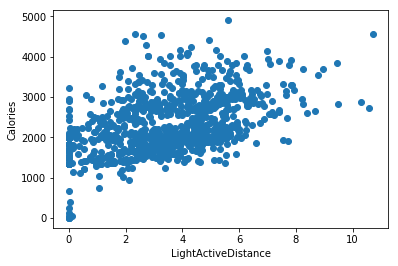

In [8]:
fig, ax = plt.subplots()

ax.scatter(fitbit_4_12_16_daily_activity["LightActiveDistance"], fitbit_4_12_16_daily_activity["Calories"]);
ax.set_xlabel("LightActiveDistance");
ax.set_ylabel("Calories");

This feature looks good. I try to make an Simple Linear Regression model with ``LightActiveDistance``

### Simple Linear Regression with ``LightActiveDistance``

In [9]:
X = fitbit_4_12_16_daily_activity["LightActiveDistance"]
y = fitbit_4_12_16_daily_activity["Calories"]
X = X[:, np.newaxis]

In [10]:
# Cross validation set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.3)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_prediction = model.predict(Xtest)

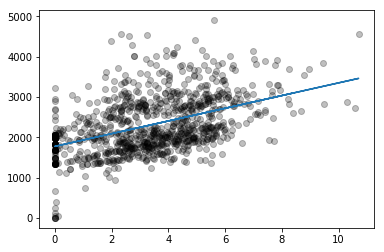

In [13]:
# Plot the straight line
plt.scatter(X, y, alpha=0.25, color="black");
plt.plot(Xtest, y_prediction)

In [14]:
# Accuracy
from sklearn.metrics import mean_absolute_error
maeList = []
mae = mean_absolute_error(ytest, y_prediction)
maeList.append(mae)
print("In average the model is %.2f calories +/- wrong" %mae)

In average the model is 512.31 calories +/- wrong


## Linear Regression with two variables


In [15]:
arrayActiveDist = fitbit_4_12_16_daily_activity["LightActiveDistance"].values
arraySteps = fitbit_4_12_16_daily_activity["TotalSteps"].values
X = np.array([arrayActiveDist, arraySteps]).T
y = np.array(fitbit_4_12_16_daily_activity["Calories"].values)
print(X.shape)
print(y.shape)

(940, 2)
(940,)


In [16]:
# Test Train set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.3)

In [17]:
model = LinearRegression(normalize=True)
model.fit(Xtrain, ytrain)
y_prediction = model.predict(Xtest)
mae = mean_absolute_error(ytest, y_prediction)
maeList.append(mae)

In [18]:
print("In average the model is %.2f calories +/- wrong" %maeList[1])

In average the model is 463.60 calories +/- wrong


In [19]:
coeff = pd.DataFrame(model.coef_, index=[["LightActiveDistance", "TotalSteps"]], columns=["Coefficient"])
coeff

,Coefficient
LightActiveDistance,26.979613
TotalSteps,0.076149


So we see the coefficients here. One unit more in ``LightActiveDistance`` mean that there is an increase of almost 27 calories. But one unit increase in ``TotalSteps`` means just 0.07 calories more.   
That makes sense because one steps doesn't consume so much.   
Unfortunately I am don't know how Light Active Distance is measures. I think it is kilometers

## Linear Regression with three variables

In [20]:
X = fitbit_4_12_16_daily_activity[["TotalSteps", "LightActiveDistance",  "ModeratelyActiveDistance"]]
X.describe()

,TotalSteps,LightActiveDistance,ModeratelyActiveDistance
count,940.000000,940.000000,940.000000
mean,7637.910638,3.340819,0.567543
std,5087.150742,2.040655,0.883580
min,0.000000,0.000000,0.000000
25%,3789.750000,1.945000,0.000000
50%,7405.500000,3.365000,0.240000
75%,10727.000000,4.782500,0.800000
max,36019.000000,10.710000,6.480000


In [21]:
# Test Train set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.3)

In [22]:
model = LinearRegression(normalize=True)
model.fit(Xtrain, ytrain)
y_prediction = model.predict(Xtest)
mae = mean_absolute_error(ytest, y_prediction)
maeList.append(mae)

In [25]:
print("In average the model is %.2f calories +/- wrong" %maeList[2])
improvement = maeList[1] - maeList[2]
print("Improvement of %.2f calories" %improvement)

In average the model is 463.09 calories +/- wrong
Improvement of 0.51 calories


In [26]:
coeff = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coeff

,Coefficient
TotalSteps,0.089403
LightActiveDistance,15.251412
ModeratelyActiveDistance,-104.966285


Here we can see that one unit more of ``ModeratelyActiveDistance`` results in less calories

## Linear Regression with many variables


In [27]:
fitbit_4_12_16_daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [29]:
listOfColumns = ["TotalSteps","LoggedActivitiesDistance", "VeryActiveDistance", "ModeratelyActiveDistance", 
                 "LightActiveDistance", "SedentaryActiveDistance", "VeryActiveMinutes", "FairlyActiveMinutes", 
                 "LightlyActiveMinutes", "SedentaryMinutes"]
X = fitbit_4_12_16_daily_activity[listOfColumns]
X.describe()

,TotalSteps,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638
std,5087.150742,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000
50%,7405.500000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000
75%,10727.000000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000
max,36019.000000,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000


In [31]:
# Test Train set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.3)

In [32]:
model = LinearRegression(normalize=True)
model.fit(Xtrain, ytrain)
y_prediction = model.predict(Xtest)
mae = mean_absolute_error(ytest, y_prediction)
maeList.append(mae)

In [35]:
print("In average the model is %.2f calories +/- wrong" %maeList[3])
improvement = maeList[2] - maeList[3]
print("Improvement of %.2f calories" %improvement)

In average the model is 336.59 calories +/- wrong
Improvement of 126.50 calories


In [36]:
coeff = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coeff

,Coefficient
TotalSteps,-0.036071
LoggedActivitiesDistance,39.694891
VeryActiveDistance,23.550233
ModeratelyActiveDistance,-338.439229
LightActiveDistance,289.624514
SedentaryActiveDistance,906.740598
VeryActiveMinutes,11.968140
FairlyActiveMinutes,18.192692
LightlyActiveMinutes,-1.917556
SedentaryMinutes,0.320708
